In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
sc=StandardScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error
mse=mean_squared_error
r2=r2_score


In [64]:
df=pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\dataset\practiceDataset.csv')

In [65]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [67]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [68]:
df.shape

(1460, 81)

C:\Users\dell\AppData\Local\Temp\ipykernel_11772\4084094595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Neighborhood',data=df,palette='viridis')


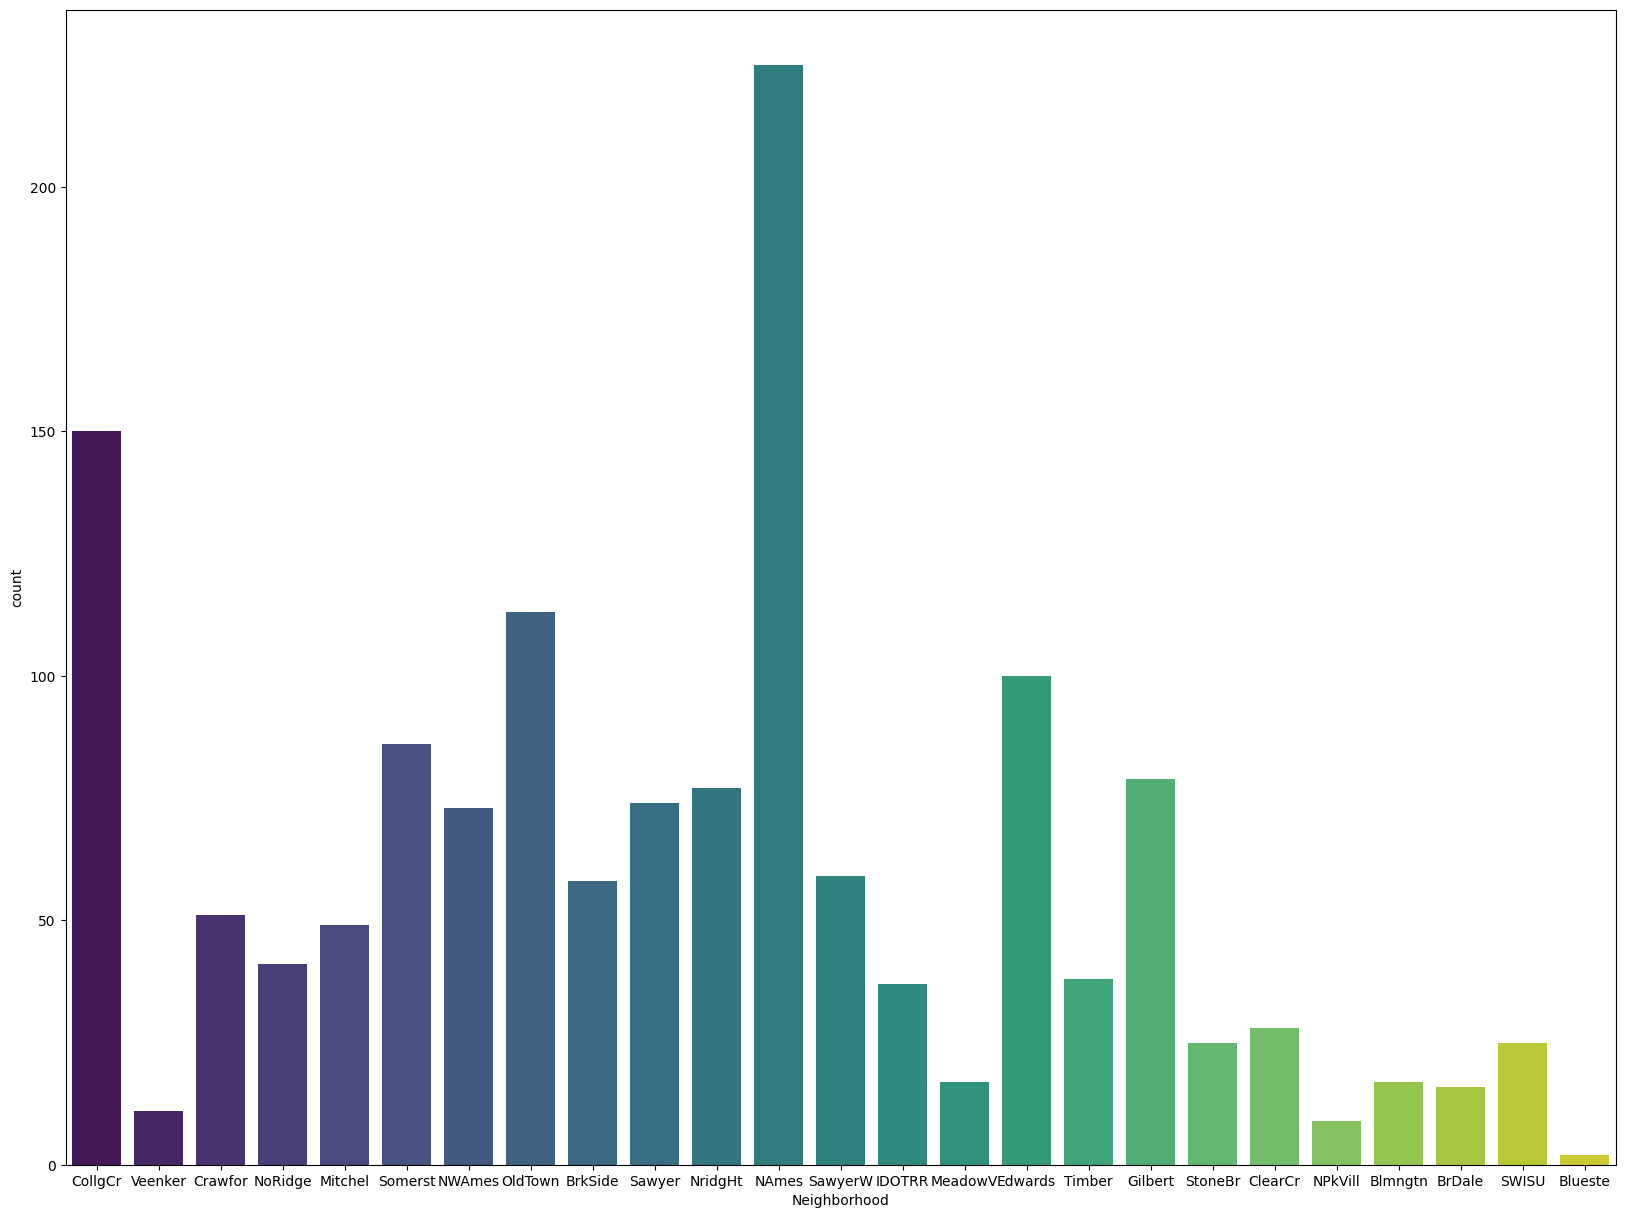

In [70]:
plt.figure(figsize=(20,15))
sns.countplot(x='Neighborhood',data=df,palette='viridis')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.piechart()

In [7]:
df['MSZoning']=le.fit_transform(df['MSZoning'])
df['Street']=le.fit_transform(df['Street'])
df['Alley']=le.fit_transform(df['Alley'])
df['LotShape']=le.fit_transform(df['LotShape'])
df['Utilities']=le.fit_transform(df['Utilities'])
df['LotConfig']=le.fit_transform(df['LotConfig'])
df['LandSlope']=le.fit_transform(df['LandSlope'])
df['Neighborhood']=le.fit_transform(df['Neighborhood'])
df['Condition1']=le.fit_transform(df['Condition1'])
df['Condition2']=le.fit_transform(df['Condition2'])
df['BldgType']=le.fit_transform(df['BldgType'])
df['HouseStyle']=le.fit_transform(df['HouseStyle'])
df['RoofStyle']=le.fit_transform(df['RoofStyle'])
df['RoofMatl']=le.fit_transform(df['RoofMatl'])
df['Exterior1st']=le.fit_transform(df['Exterior1st'])
df['Exterior2nd']=le.fit_transform(df['Exterior2nd'])
df['MasVnrType']=le.fit_transform(df['MasVnrType'])
df['ExterQual']=le.fit_transform(df['ExterQual'])
df['ExterCond']=le.fit_transform(df['ExterCond'])
df['Foundation']=le.fit_transform(df['Foundation'])
df['BsmtQual']=le.fit_transform(df['BsmtQual'])
df['BsmtCond']=le.fit_transform(df['BsmtCond'])
df['BsmtExposure']=le.fit_transform(df['BsmtExposure'])
df['BsmtFinType1']=le.fit_transform(df['BsmtFinType1'])
df['BsmtFinType2']=le.fit_transform(df['BsmtFinType2'])
df['Heating']=le.fit_transform(df['Heating'])
df['CentralAir']=le.fit_transform(df['CentralAir'])
df['Electrical']=le.fit_transform(df['Electrical'])
df['KitchenQual']=le.fit_transform(df['KitchenQual'])
df['Functional']=le.fit_transform(df['Functional'])
df['FireplaceQu']=le.fit_transform(df['FireplaceQu'])
df['GarageType']=le.fit_transform(df['GarageType'])
df['GarageFinish']=le.fit_transform(df['GarageFinish'])
df['GarageQual']=le.fit_transform(df['GarageQual'])
df['GarageCond']=le.fit_transform(df['GarageCond'])
df['PavedDrive']=le.fit_transform(df['PavedDrive'])
df['PoolQC']=le.fit_transform(df['PoolQC'])
df['Fence']=le.fit_transform(df['Fence'])
df['MiscFeature']=le.fit_transform(df['MiscFeature'])
df['LandContour']=le.fit_transform(df['LandContour'])
df['SaleType']=le.fit_transform(df['SaleType'])
df['SaleCondition']=le.fit_transform(df['SaleCondition'])
df['HeatingQC']=le.fit_transform(df['HeatingQC'])

In [8]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [9]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())

In [12]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.009921,-0.033226,0.008916,-0.001530,0.032122,-0.019659,0.013324,...,0.057044,-0.033928,-0.000399,0.037057,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.356718,-0.139781,-0.024969,-0.105995,0.119289,-0.002940,-0.022844,...,0.008283,-0.005221,0.086360,0.034859,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.105961,-0.034452,0.087654,-0.052039,0.061887,-0.017854,-0.001192,...,-0.003128,0.002882,-0.061289,0.000673,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.009921,-0.356718,-0.105961,1.000000,0.304522,-0.037349,0.132003,-0.138877,-0.076080,-0.001027,...,0.180819,-0.191902,-0.036421,-0.004266,-0.000255,0.010451,0.006380,-0.031412,0.058857,0.334771
LotArea,-0.033226,-0.139781,-0.034452,0.304522,1.000000,-0.197131,0.060105,-0.165315,-0.149083,0.010123,...,0.077672,-0.065167,0.036031,-0.103544,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.010451,0.001205,0.003690,0.013094,-0.033455,-0.011599,-0.051552,...,-0.033737,0.036368,-0.009892,-0.014193,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,0.006380,-0.014261,-0.025043,0.020944,0.036449,0.020507,0.023353,...,-0.059689,0.060904,-0.035366,-0.055962,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,-0.031412,0.012292,0.014339,0.008205,-0.000911,-0.025754,-0.126770,...,0.011009,-0.013592,-0.006154,-0.003311,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.058857,0.034169,0.006064,0.035717,-0.038118,0.033809,-0.089701,...,-0.067251,0.097425,0.100675,0.003192,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


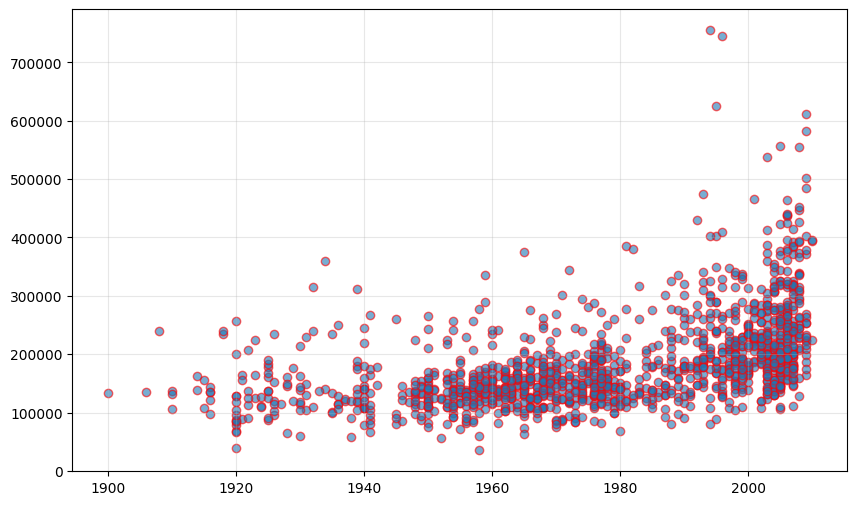

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df['GarageYrBlt'],df['SalePrice'],alpha=0.6,edgecolors='r')
plt.grid(alpha=0.3)
plt.show()

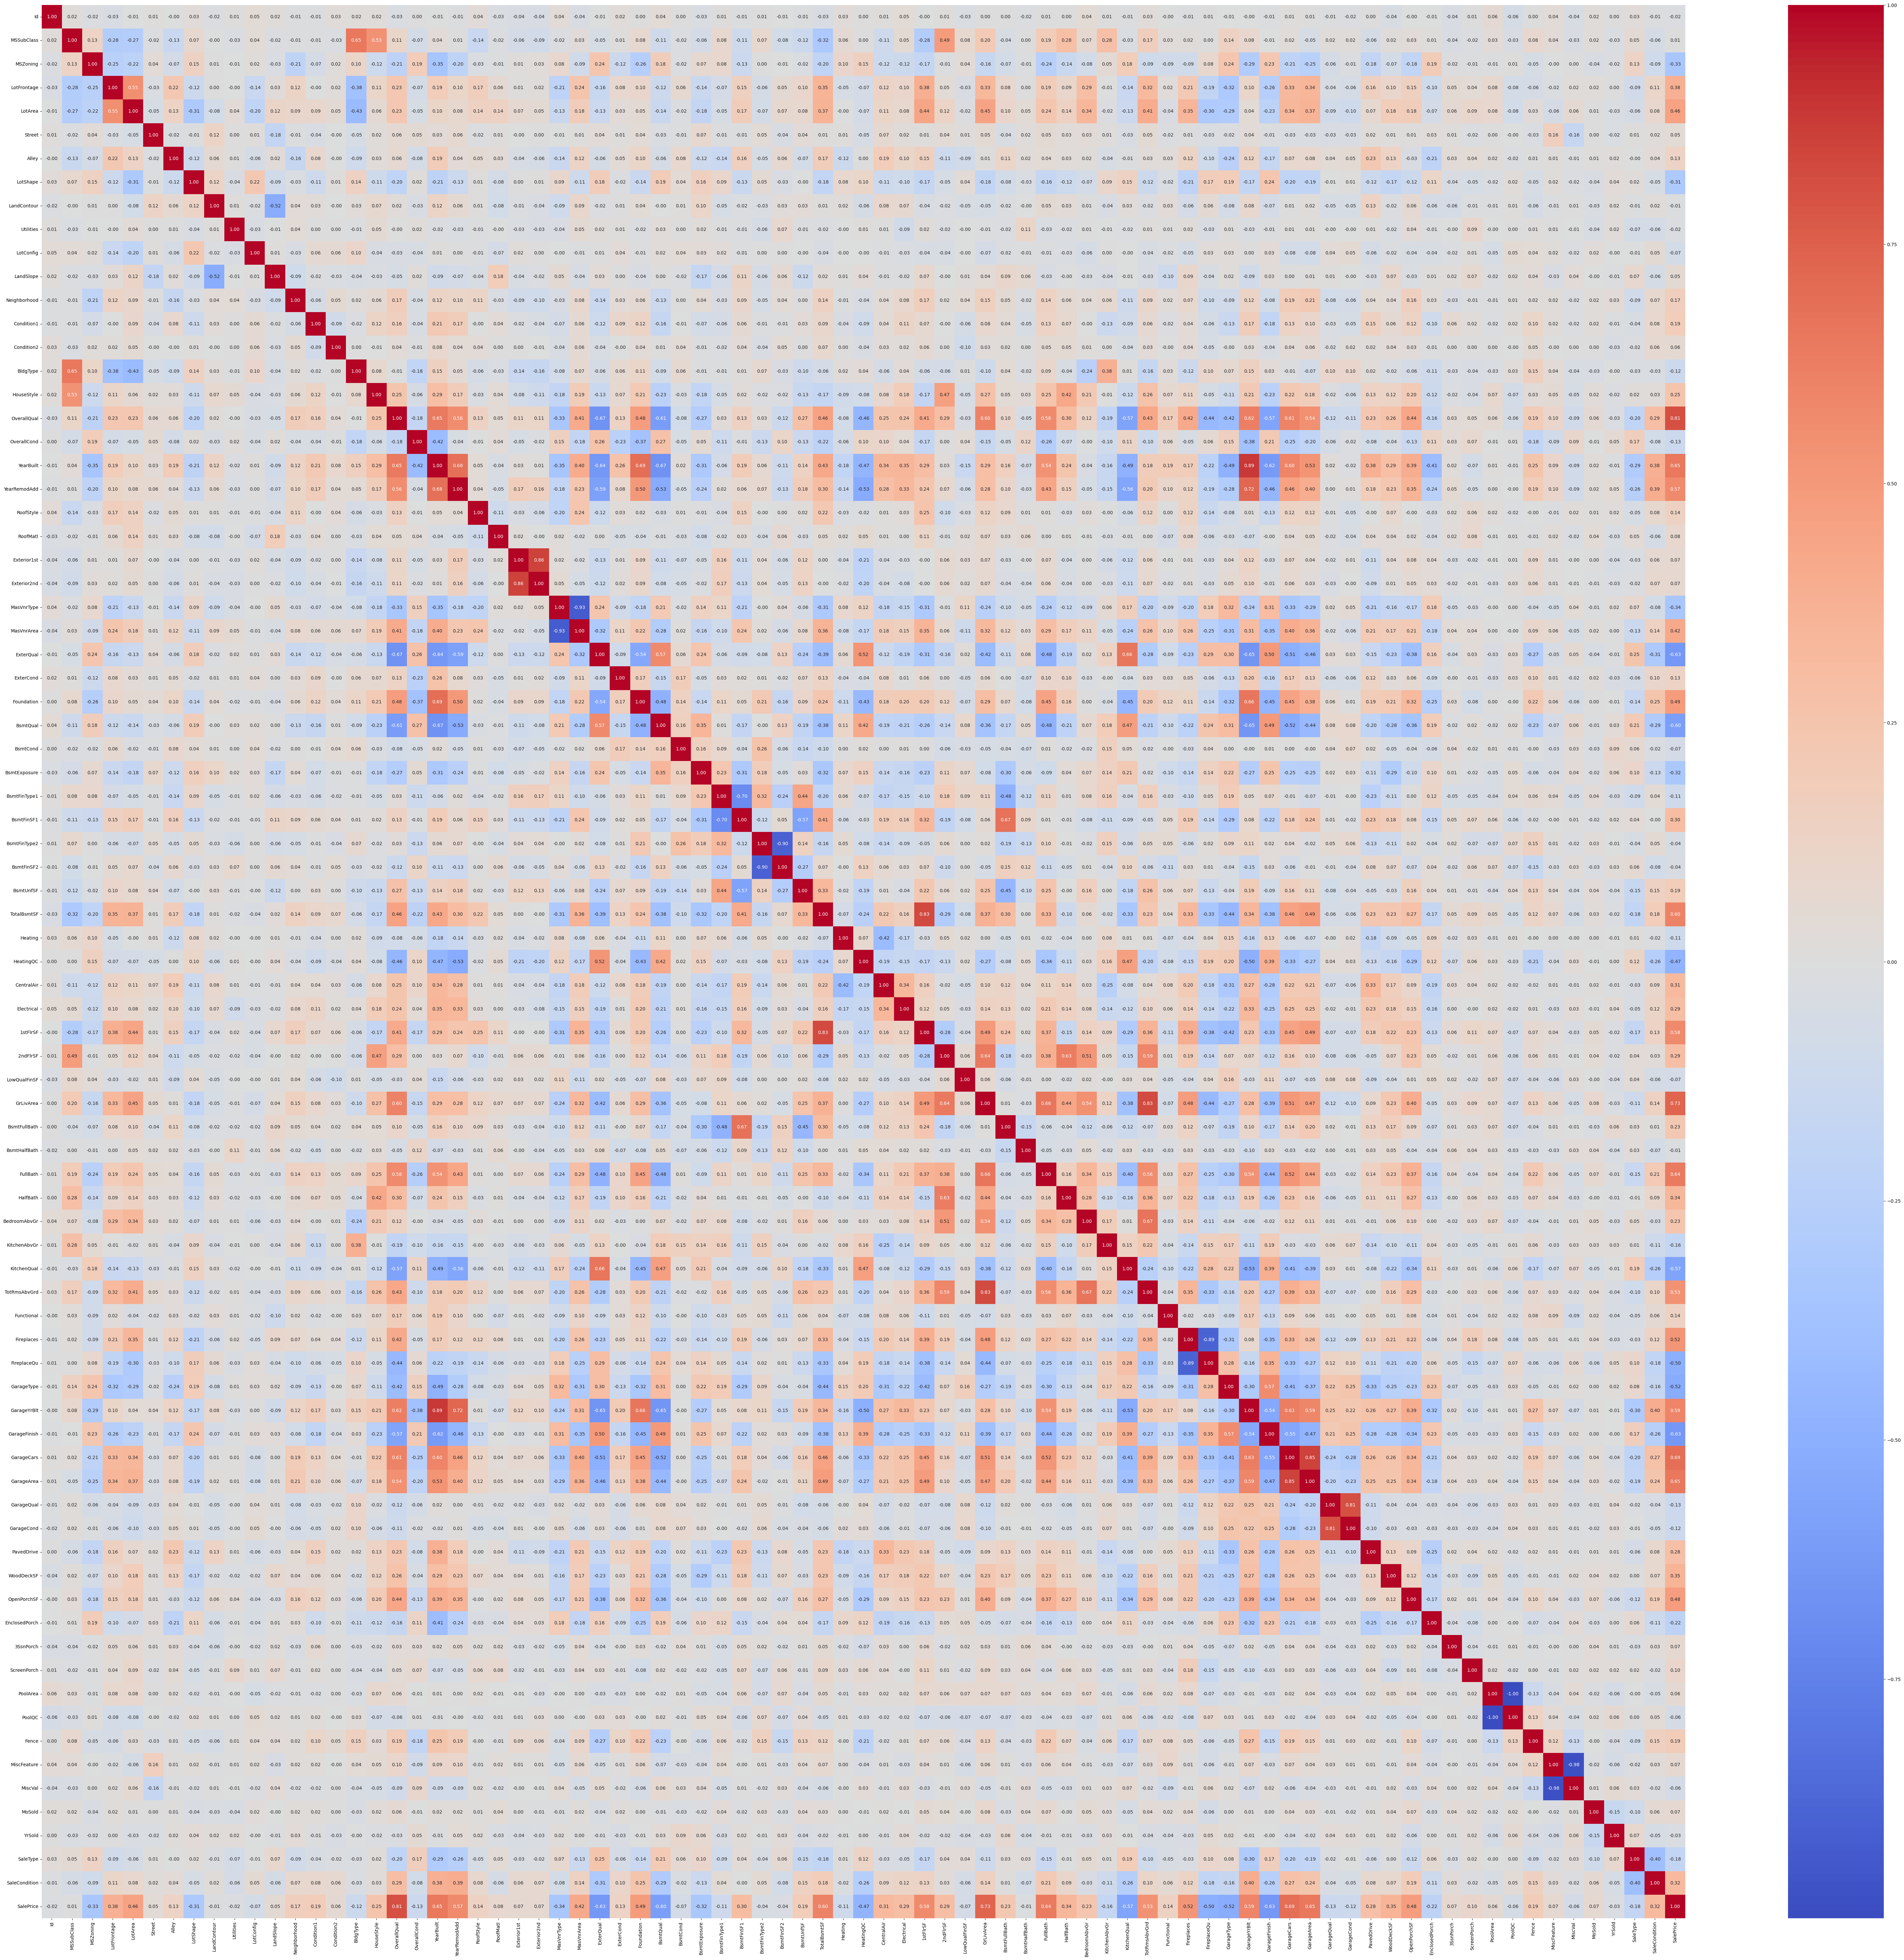

In [23]:
spearman_correlation=df.corr(method='spearman')
plt.figure(figsize=(80,75))
sns.heatmap(spearman_correlation,annot=True,fmt='.2f',cmap='coolwarm',cbar=True)
plt.show()

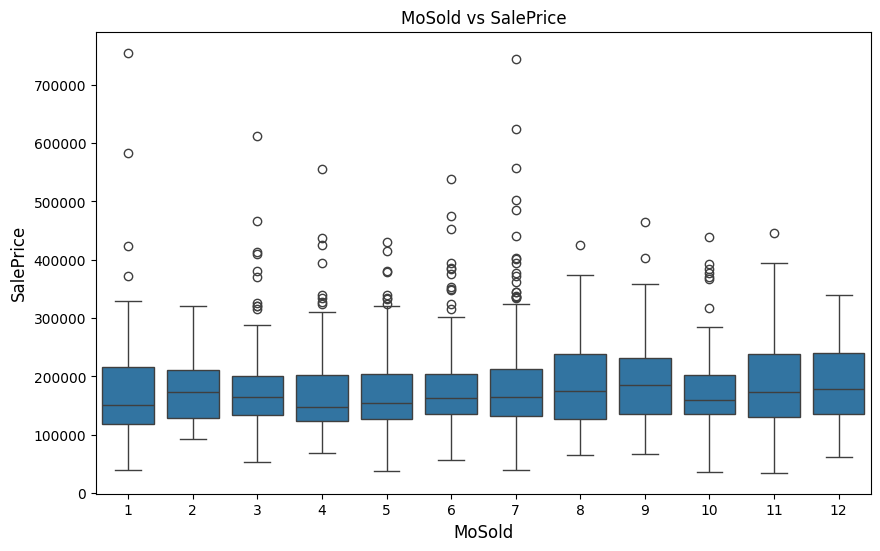

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='MoSold', y='SalePrice', data=df)
plt.title('MoSold vs SalePrice')
plt.xlabel('MoSold',fontsize=12)
plt.ylabel('SalePrice',fontsize=12)
plt.show()

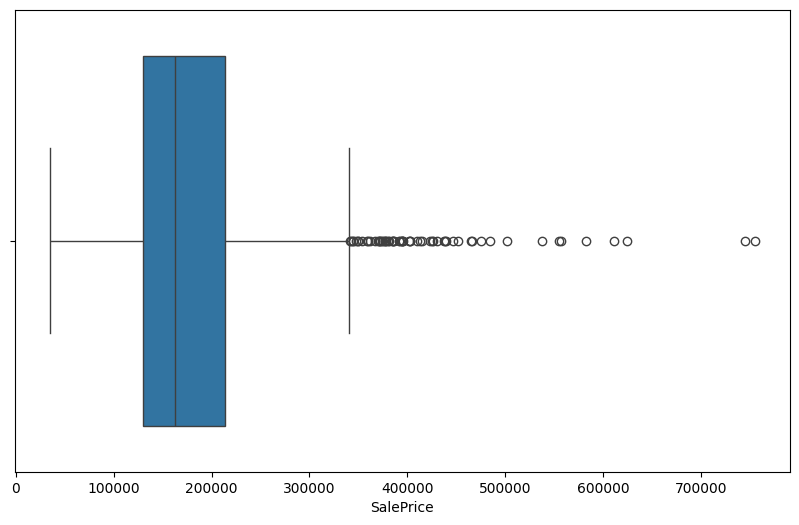

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['SalePrice'])
plt.show()

In [55]:
Q1=df['SalePrice'].quantile(0.25)
Q3=df['SalePrice'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)
outliers=df[(df['SalePrice']<lower_bound)|(df['SalePrice']>upper_bound)]
print(outliers)

67500.0
271250.0
541250.0
        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
440    441          20         3        105.0    15431       1      2   
691    692          60         3        104.0    21535       1      2   
803    804          60         3        107.0    13891       1      2   
898    899          20         3        100.0    12919       1      2   
1046  1047          60         3         85.0    16056       1      2   
1169  1170          60         3        118.0    35760       1      2   
1182  1183          60         3        160.0    15623       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
440          3            3          0  ...         0       3      4   
691          0            3          0  ...         0       3      4   
803          3            3          0  ...         0       3      4   
898          0            3          0  ...         0       3      4   
1046         0            3  

In [56]:
df=df[~((df['SalePrice']>=(Q1-1.5*IQR))&(df['SalePrice']<=(Q3+1.5*IQR)))]

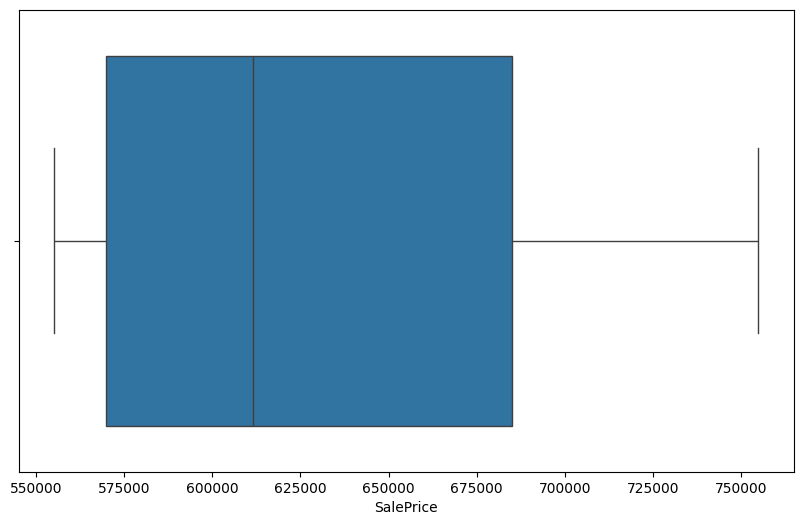

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['SalePrice'])
plt.show()

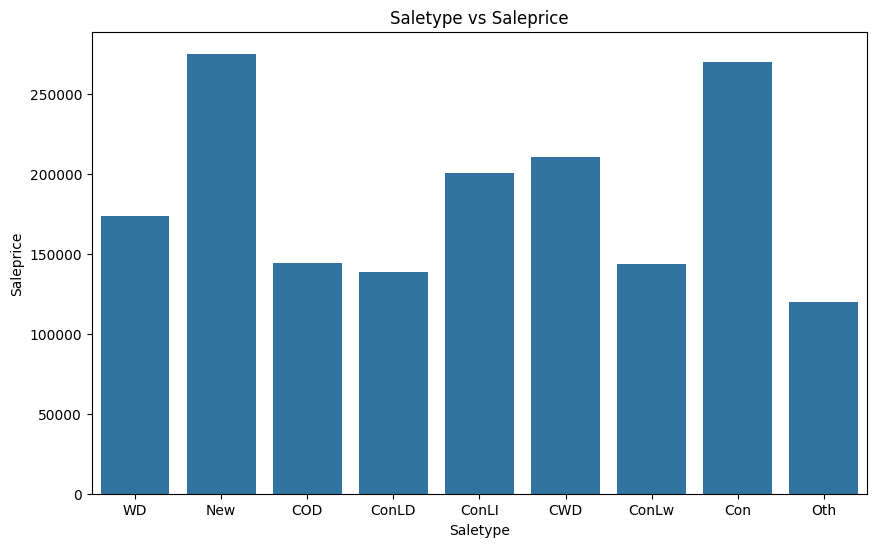

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(x='SaleType',y='SalePrice',data=df,errorbar=None)
plt.title('Saletype vs Saleprice')
plt.xlabel('Saletype')
plt.ylabel('Saleprice')
plt.show()


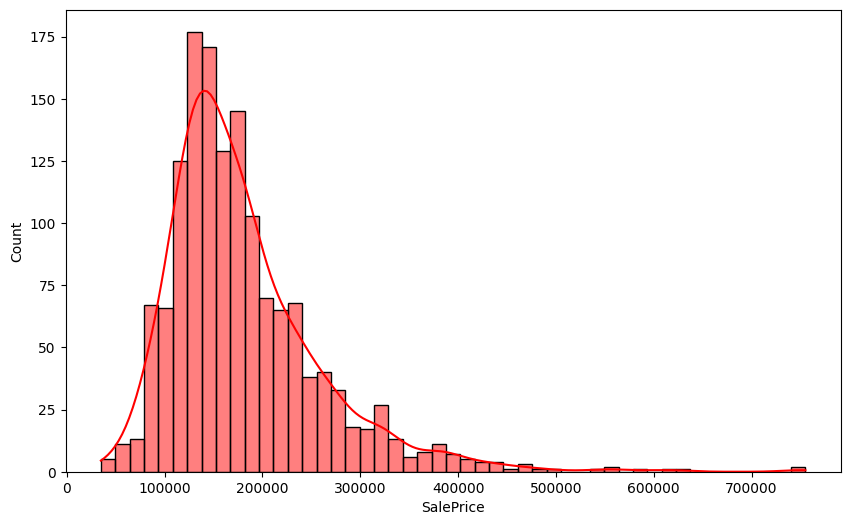

In [84]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'],kde=True,color='red')
plt.show()